## Minimizing Customer Attrition

## Using Linear Probability Models to Find High-Risk Customers

In [1]:
import pandas as pd
attrition_past = pd.read_csv('https://bradfordtuckfield.com/attrition_past.csv')
print(attrition_past.head())

  corporation  lastmonth_activity  lastyear_activity  number_of_employees  \
0        abcd                  78               1024                   12   
1        asdf                  14               2145                   20   
2        xyzz                 182               3891                   35   
3        acme                 101              10983                    2   
4        qwer                   0                118                   42   

   exited  
0       1  
1       0  
2       0  
3       1  
4       1  


In [2]:
pd.set_option('display.max_columns',6)
# prints x # of columns; using None instead of 6 prints all columns
print(attrition_past)

   corporation  lastmonth_activity  lastyear_activity  number_of_employees  \
0         abcd                  78               1024                   12   
1         asdf                  14               2145                   20   
2         xyzz                 182               3891                   35   
3         acme                 101              10983                    2   
4         qwer                   0                118                   42   
5         tyui                 929               1992                    1   
6         zxcv                  19                455                    8   
7         hjkl                  94                868                    3   
8         lmno                  81               1401                   10   
9         qqqq                  52                650                   11   
10        corp                1090               2452                    9   
11        ekci                   6                 88           

In [3]:
# Plotting Attrition Risk

print(attrition_past['exited'].mean())

0.5769230769230769


58% of clients in the data exited their contracts in the last six months -> attrition is an issue

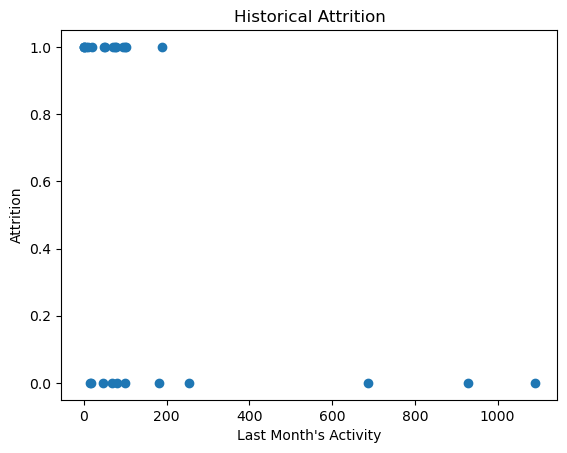

In [4]:
from matplotlib import pyplot as plt
plt.scatter(attrition_past['lastmonth_activity'],attrition_past['exited'])
plt.title('Historical Attrition')
plt.xlabel('Last Month\'s Activity')
plt.ylabel('Attrition')
plt.show()

Interpretation: Clients who were very active (>600) did not exit their contracts in the six months after their high activity was recorded.

In [5]:
# Confirming Relationships with Linear Regression

x = attrition_past['lastmonth_activity'].values.reshape(-1,1)
y = attrition_past['exited'].values.reshape(-1,1)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, y)

LinearRegression()

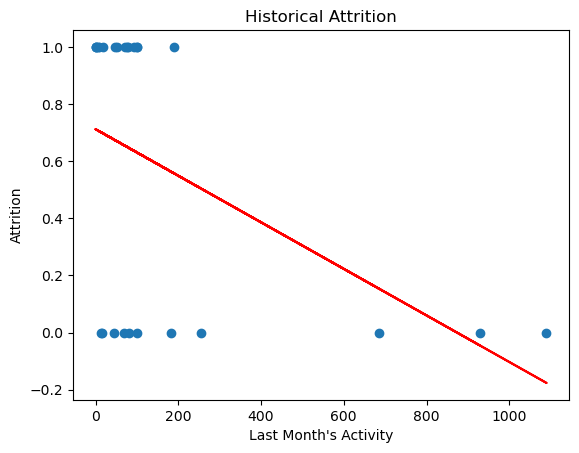

In [6]:
from matplotlib import pyplot as plt
plt.scatter(attrition_past['lastmonth_activity'],attrition_past['exited'])
prediction = [regressor.coef_[0]*x+regressor.intercept_[0] for x in \
list(attrition_past['lastmonth_activity'])]
plt.plot(attrition_past['lastmonth_activity'],  prediction, color='red')
plt.title('Historical Attrition')
plt.xlabel('Last Month\'s Activity')
plt.ylabel('Attrition')
plt.show()

Interpretation: We estimate that a client with an activity level of 400 has a 40% attrition risk.

###### Linear Probability Model (LPM): linear regression on binary data

attrition risk = exit probability

In [8]:
attrition_past['predicted']=regressor.predict(x)
# calculates the attrition risk for each client
print(attrition_past.head())

  corporation  lastmonth_activity  lastyear_activity  number_of_employees  \
0        abcd                  78               1024                   12   
1        asdf                  14               2145                   20   
2        xyzz                 182               3891                   35   
3        acme                 101              10983                    2   
4        qwer                   0                118                   42   

   exited  predicted  
0       1   0.648363  
1       0   0.700525  
2       0   0.563600  
3       1   0.629618  
4       1   0.711936  


Attrition prediction: 
    (1) Learn relationships between features and target variables by using data from the past
    (2) Use the relationships that we learned from past data to make predictions for the future

In [9]:
# Predicting the Future

attrition_future=pd.read_csv('http://bradfordtuckfield.com/attrition2.csv')
# new data, which was generated today
print(attrition_future.head())

  corporation  lastmonth_activity  lastyear_activity  number_of_employees
0        hhtn                 166               1393                   91
1        slfm                 824              16920                  288
2        pryr                  68                549                   12
3        ahva                 121               1491                   16
4        dmai                   4                 94                    2


In [10]:
X=attrition_future['lastmonth_activity'].values.reshape(-1,1)
attrition_future['predicted']=regressor.predict(x)
print(attrition_future.head())

  corporation  lastmonth_activity  lastyear_activity  number_of_employees  \
0        hhtn                 166               1393                   91   
1        slfm                 824              16920                  288   
2        pryr                  68                549                   12   
3        ahva                 121               1491                   16   
4        dmai                   4                 94                    2   

   predicted  
0   0.648363  
1   0.700525  
2   0.563600  
3   0.629618  
4   0.711936  


In [12]:
# Making Business Recommendations

print(attrition_future.nlargest(5, 'predicted'))
# specifies number of clients n that have a time and bandwith that needs focus
# creats a list of top n highest-risk clients

   corporation  lastmonth_activity  lastyear_activity  number_of_employees  \
4         dmai                   4                 94                    2   
20        wlcj                 158               2813                    6   
24        pian                   0                 12                   19   
11        ejdc                  95               1005                   61   
23        hlly                  45                468                    3   

    predicted  
4    0.711936  
20   0.711936  
24   0.711936  
11   0.707045  
23   0.704600  


In [14]:
print(list(attrition_future.sort_values(by='predicted',ascending=False).loc[:,'corporation']))
# sorts clients from highest to lowest attrition risk

['pian', 'dmai', 'wlcj', 'ejdc', 'hlly', 'slfm', 'ynus', 'frgv', 'dwgt', 'hlpd', 'oscr', 'cred', 'angl', 'pevc', 'hhtn', 'whsh', 'grce', 'mike', 'xkcd', 'ahva', 'pryr', 'bass', 'erin', 'zamk', 'skct', 'kdic']


In [15]:
print(list(attrition_future.loc[attrition_future['predicted']>0.7,'corporation']))

['slfm', 'dmai', 'ejdc', 'wlcj', 'hlly', 'pian']


In [16]:
# Measuring Prediction Accuracy

themedian=attrition_past['predicted'].median() # median of predicted column
prediction=list(1*(attrition_past['predicted']>themedian))
# 0 when LPM predicts below-medium probability, 1 when above-median probability
actual=list(attrition_past['exited'])

Every confusion matrix has the following structure: \
[[true positives    false positives] \
 [false negatives   true negatives]]

In [20]:
# confusion matrix - a standard way to measure accuracy in classification models
from sklearn.metrics import confusion_matrix
print(confusion_matrix(prediction,actual))

[[7 6]
 [4 9]]


Seven true-positive classifications: for seven corporations, our model predicted above-median exit probability (high attrition risk), and those seven corporation did exit.

Six false-positives: Six cases in which we predicted above-median exit probability but the corporation didn't exit.

Four false-negatives: Four cases in which we predicted below-median exit probability but the corporation did exit.

Nine true-negatives: Nine cases in which we predicted below-median exit probability for clients that did not exit.

Precision: true positives / (true positives + false positives)
- Out of everything we thought was positive, how many times was it actually positive? 
    - (In our case, positive refers to attrition—out of all the times we thought a client was at high risk of leaving, how many times did they actually leave?)

Recall (aka sensitivity): true positives / (true positives + false negatives)
- Out of all the actually positive cases, how many did we think were positive? 
    - (In other words, out of all the clients who actually exited their contracts, how many did we predict were at high attrition risk?) 
    
If false positives are high, precision will be low. <br>
If false negatives are high, recall will be low. <br>
Ideally, both will be as high as possible.

In [22]:
conf_mat = confusion_matrix(prediction,actual)
precision = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[0][1])
recall = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])

print(precision)
print(recall)

0.5384615384615384
0.6363636363636364


In [23]:
# Using Multivariate LPMs

x3 = attrition_past.loc[:,['lastmonth_activity', 'lastyear_activity','number_of_employees']].values.reshape(-1,3)
y = attrition_past['exited'].values.reshape(-1,1)
regressor_multi = LinearRegression()
regressor_multi.fit(x3, y)

LinearRegression()

In [24]:
# multivariate linear probability model
attrition_future['predicted_multi']=regressor_multi.predict(x3)

print(attrition_future.nlargest(5,'predicted_multi'))

   corporation  lastmonth_activity  lastyear_activity  number_of_employees  \
11        ejdc                  95               1005                   61   
12        mike                   0                  0                   49   
13        pevc                   4                  6                 1686   
4         dmai                   4                 94                    2   
22        ynus                   9                 90                   12   

    predicted  predicted_multi  
11   0.707045         0.870000  
12   0.631248         0.815677  
13   0.650809         0.788110  
4    0.711936         0.755625  
22   0.698895         0.715362  


In [26]:
print(list(attrition_future.sort_values(by='predicted_multi',ascending=False).loc[:,'corporation']))

['ejdc', 'mike', 'pevc', 'dmai', 'ynus', 'wlcj', 'angl', 'pian', 'slfm', 'hlpd', 'frgv', 'hlly', 'oscr', 'cred', 'dwgt', 'hhtn', 'whsh', 'grce', 'pryr', 'xkcd', 'bass', 'ahva', 'erin', 'zamk', 'skct', 'kdic']


In [27]:
# Creating New Metrics

# derived feature (or engineered feature) - a feature or metric created by transforming and combing existing variables
attrition_future['activity_per_employee']=attrition_future.loc[:,'lastmonth_activity']/attrition_future.loc[:,'number_of_employees']

In [28]:
attrition_past['activity_per_employee']=attrition_past.loc[:,'lastmonth_activity']/attrition_past.loc[:,'number_of_employees']
x = attrition_past.loc[:,['activity_per_employee','lastmonth_activity','lastyear_activity', 'number_of_employees']].values.reshape(-1,4)
y = attrition_past['exited'].values.reshape(-1,1)

regressor_derived= LinearRegression()
regressor_derived.fit(x, y)
attrition_past['predicted3']=regressor_derived.predict(x)

x = attrition_future.loc[:,['activity_per_employee','lastmonth_activity','lastyear_activity', 'number_of_employees']].values.reshape(-1,4)
attrition_future['predicted3']=regressor_derived.predict(x)

In [29]:
print(list(attrition_future.sort_values(by='predicted3',ascending=False).loc[:,'corporation']))

['pevc', 'bass', 'frgv', 'hlpd', 'angl', 'oscr', 'zamk', 'whsh', 'mike', 'hhtn', 'ejdc', 'grce', 'pian', 'ynus', 'dmai', 'kdic', 'erin', 'slfm', 'dwgt', 'pryr', 'hlly', 'xkcd', 'skct', 'ahva', 'wlcj', 'cred']


In [30]:
themedian=attrition_past['predicted3'].median()
prediction=list(1*(attrition_past['predicted3']>themedian))
actual=list(attrition_past['exited'])

print(confusion_matrix(prediction,actual))

[[ 9  4]
 [ 2 11]]


In [31]:
conf_mat = confusion_matrix(prediction,actual)
precision = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[0][1])
recall = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])

print(precision)
print(recall)

0.6923076923076923
0.8181818181818182


###### Considering the Weaknesses of LPMS

- LPMs don’t fit the points of a dataset well: they pass through the middle of the points and get close to only a few points
- no reasonable way to interpret a negative probability; it’s just nonsense that our model has output

Any non-horizontal regression line will make predictions that are below 0 percent or above 100 percent for certain values.

## Predicting Binary Outcomes with Logistic Regression

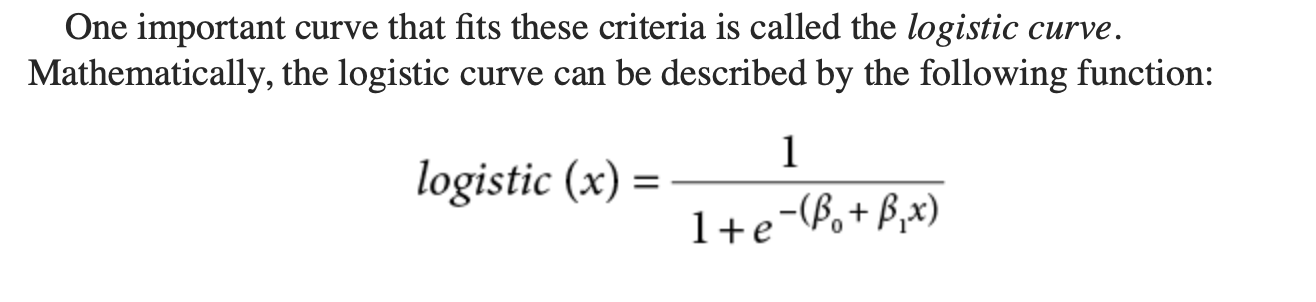

linear regression: β0 + β1·x

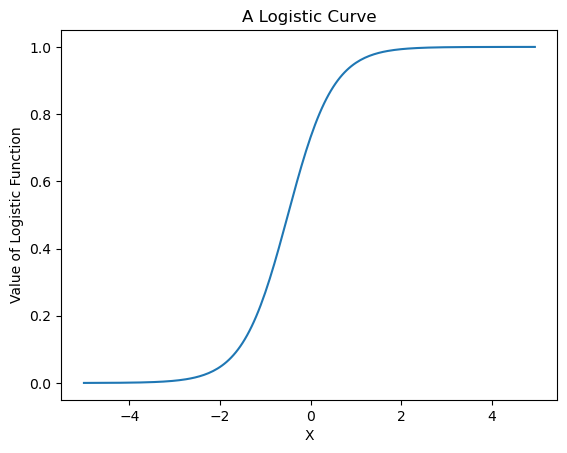

In [32]:
# Drawing Logistic Curves

from matplotlib import pyplot as plt
import numpy as np
import math
x = np.arange(-5, 5, 0.05)
y = (1/(1+np.exp(-1-2*x)))
plt.plot(x,y)
plt.xlabel("X")
plt.ylabel("Value of Logistic Function")
plt.title('A Logistic Curve')
plt.show()

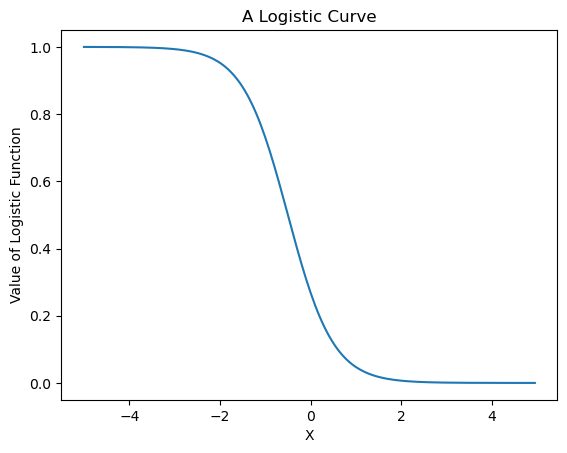

In [33]:
# changing negatives and positives changes direction

from matplotlib import pyplot as plt
import numpy as np
import math
x = np.arange(-5, 5, 0.05)
y = (1/(1+np.exp(1+2*x)))
plt.plot(x,y)
plt.xlabel("X")
plt.ylabel("Value of Logistic Function")
plt.title('A Logistic Curve')
plt.show()

In [34]:
# Fitting the Logistic Function to Our Data

# logistic regression: fitting a logistic curve to binary data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)
x = attrition_past['lastmonth_activity'].values.reshape(-1,1)
y = attrition_past['exited']
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [35]:
attrition_past['logisticprediction']=model.predict_proba(x)[:,1]

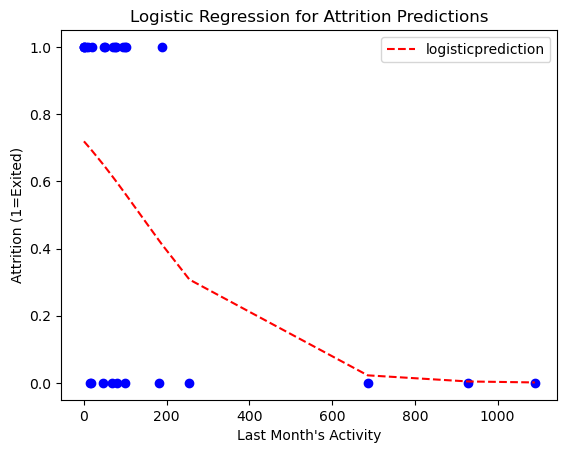

In [36]:
fig = plt.scatter(attrition_past['lastmonth_activity'],attrition_past['exited'], color='blue')
attrition_past.sort_values('lastmonth_activity').plot('lastmonth_activity',\
'logisticprediction',ls='--', ax=fig.axes,color='red')
plt.title('Logistic Regression for Attrition Predictions')
plt.xlabel('Last Month\'s Activity')
plt.ylabel('Attrition (1=Exited)')
plt.show()

A regression that never predicts above 100 percent or below 0 percent probability and gets very close to some of the points in our strange “cloud.” <br>
We’ve resolved the weaknesses of LPMs with this new method.

In [39]:
x = attrition_future['lastmonth_activity'].values.reshape(-1,1)
attrition_future['logisticprediction']=model.predict_proba(x)[:,1]
print(list(attrition_future.sort_values(by='logisticprediction',\
ascending=False).loc[:,'corporation']))

['whsh', 'pian', 'mike', 'bass', 'pevc', 'dmai', 'ynus', 'kdic', 'hlpd', 'angl', 'erin', 'oscr', 'grce', 'zamk', 'hlly', 'xkcd', 'dwgt', 'pryr', 'skct', 'frgv', 'ejdc', 'ahva', 'wlcj', 'hhtn', 'slfm', 'cred']


## Applications of Binary Classification

- Logistic regressions and LPMs are commonly used to predict binary outcomes.
- LPMs and logistic regressions are both monotonic: they express a trend that moves in only one direction
    - They will be unable to predict an up down up trend